In [86]:
import numpy as np
from scipy.stats import binom
import pandas as pd
from random import uniform
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("coin_toss.csv", sep="\t")

In [88]:
theta_a = 0.6 # Initial probability is a guess work as estimates for theta are unknown.
theta_b = 0.5 # Initial probability is a guess work as estimates for theta are unknown.

In [89]:
ar = df.values

In [90]:
n = 10 #To generate each record coin was tossed 10 times.
p_distribution_df = pd.DataFrame(columns = ['coin_a','coin_b'])
expected_heads_tails_based_on_distribution_df = pd.DataFrame(columns = ['coin_a_heads','coin_a_tails','coin_b_heads','coin_b_tails'])
not_convergence = True
probability_a = []
probability_b = []
iterations = 0
while not_convergence:
    iterations = iterations + 1

    
    #********** Expectation Step **********#
    for x in range (5): 
        k = ar[x,0] #head count in each record.
        binomial_distribution_coin_a = binom.pmf(k,n,theta_a)
        binomial_distribution_coin_b = binom.pmf(k,n,theta_b)
        probability_distribution_of_coin_a = binomial_distribution_coin_a / (binomial_distribution_coin_a + binomial_distribution_coin_b)
        probability_distribution_of_coin_a = round(probability_distribution_of_coin_a,2)
        probability_distribution_of_coin_b = binomial_distribution_coin_b / (binomial_distribution_coin_a + binomial_distribution_coin_b)
        probability_distribution_of_coin_b = round(probability_distribution_of_coin_b,2)
        p_distribution_df = p_distribution_df.append({'coin_a' : probability_distribution_of_coin_a, 'coin_b' : probability_distribution_of_coin_b},ignore_index=True) 
        expected_heads_a = probability_distribution_of_coin_a * ar[x,0]
        expected_tails_a = probability_distribution_of_coin_a * ar[x,1]
        expected_heads_b = probability_distribution_of_coin_b * ar[x,0]
        expected_tails_b = probability_distribution_of_coin_b * ar[x,1]
        expected_heads_tails_based_on_distribution_df = expected_heads_tails_based_on_distribution_df.append({'coin_a_heads' : expected_heads_a,'coin_a_tails' : expected_tails_a,'coin_b_heads' : expected_heads_b,'coin_b_tails' : expected_tails_b}, ignore_index=True)

        
    #********** Maximization Step ***********#
    updated_theta_a = expected_heads_tails_based_on_distribution_df['coin_a_heads'].sum() / (expected_heads_tails_based_on_distribution_df['coin_a_heads'].sum()+ expected_heads_tails_based_on_distribution_df['coin_a_tails'].sum())
    updated_theta_a = float("{0:.5f}".format(updated_theta_a))
    updated_theta_b = expected_heads_tails_based_on_distribution_df['coin_b_heads'].sum() / (expected_heads_tails_based_on_distribution_df['coin_b_heads'].sum()+ expected_heads_tails_based_on_distribution_df['coin_b_tails'].sum())
    updated_theta_b = float("{0:.5f}".format(updated_theta_b))
    absolute_difference_a = abs(updated_theta_a - theta_a)
    absolute_difference_b = abs(updated_theta_b - theta_b)
    if absolute_difference_a < 0.0001 and absolute_difference_b < 0.0001:
        not_convergence = False
    else:
        theta_a = updated_theta_a # Maximization Step.

        theta_b = updated_theta_b # Maximization Step.
#    print(round(theta_a, 2), round(theta_b, 2))
    probability_a.append(theta_a)
    probability_b.append(theta_b)


#********** EM Output **********#
print(theta_a)
print(theta_b)
print(iterations)
        


0.71 0.58
0.73 0.58
0.74 0.57
0.74 0.57
0.75 0.56
0.75 0.56
0.75 0.56
0.76 0.55
0.76 0.55
0.76 0.55
0.76 0.55
0.76 0.55
0.77 0.55
0.77 0.55
0.77 0.55
0.77 0.54
0.77 0.54
0.77 0.54
0.77 0.54
0.77 0.54
0.77 0.54
0.77 0.54
0.77 0.54
0.77 0.54
0.77 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.54
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78 0.53
0.78463
0.53077
73


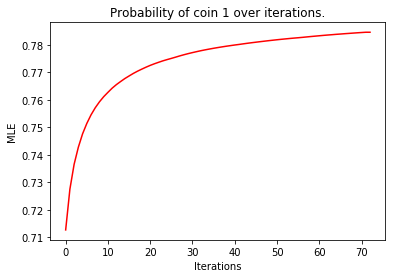

In [91]:
plt.plot(probability_a, 'r')
plt.title('Probability of coin 1 over iterations.')
plt.ylabel('MLE')
plt.xlabel('Iterations')
plt.show()

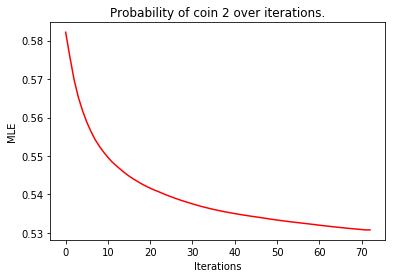

In [92]:
plt.plot(probability_b, 'r')
plt.title('Probability of coin 2 over iterations.')
plt.ylabel('MLE')
plt.xlabel('Iterations')
plt.show()